In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from FBSNNs import *
from CallOptionsBasket import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 64  # number of trajectories (batch size)
N = 100  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1] * int(D))[None, :]
T = 1.0

"Available architectures"
mode = "NAIS-Net"  # FC, Resnet and NAIS-Net are available
activation = "Sine"  # Sine and ReLU are available
model = CallOptionsBasket(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [4]:
model.load_model("models/100DCallOption.pth")

In [ ]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 39900, Loss: 2.933e+01, Y0: 1.596, Time: 0.18, Learning Rate: 1.000e-09
total time: 17.843403577804565 s


In [5]:
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)


In [6]:
Y_pred = Y_pred * 100

In [7]:
graph = model.iteration, model.training_loss

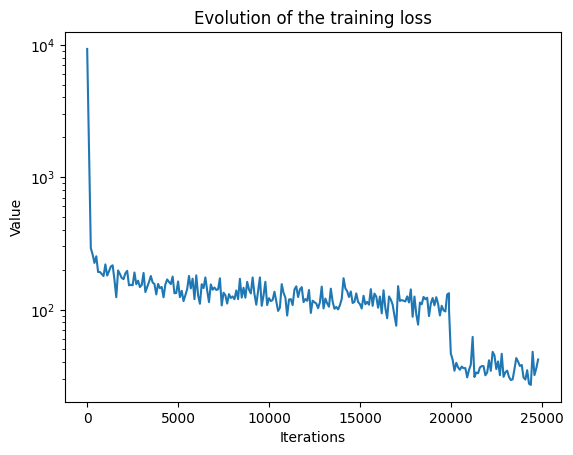

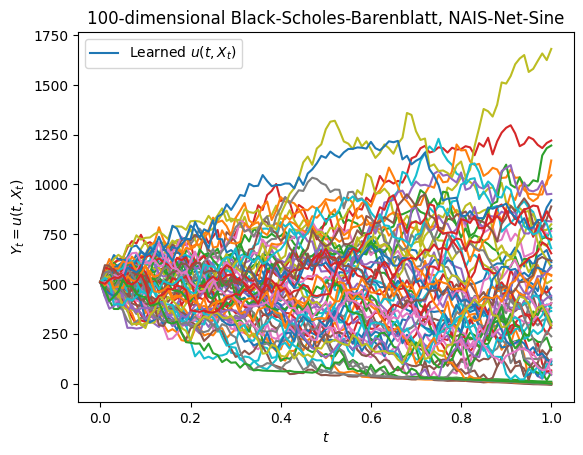

In [8]:
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 64

plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, label='Learned $u(t,X_t)$')


plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T)

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.show()

In [9]:
Y_pred.shape

(4096, 101, 1)

In [10]:
Y_preds = Y_pred.reshape(4096, 101)

In [11]:
time_stamps = t_test[0].reshape(101,)
time_stamps

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ], dtype=float32)

In [12]:
Y_preds[:,0][:,None]

array([[508.94412],
       [508.94412],
       [508.94412],
       ...,
       [508.94412],
       [508.94412],
       [508.94412]], dtype=float32)

In [13]:
Y_preds

array([[ 5.0894412e+02,  5.3250195e+02,  5.7124207e+02, ...,
         4.4776636e+02,  4.8864041e+02,  4.3082352e+02],
       [ 5.0894412e+02,  5.6577661e+02,  5.5122534e+02, ...,
         1.8465840e+00,  1.0510528e+00, -6.0944921e-01],
       [ 5.0894412e+02,  5.1285168e+02,  4.9497318e+02, ...,
         7.2937463e+02,  7.3552081e+02,  7.7805817e+02],
       ...,
       [ 5.0894412e+02,  4.8287134e+02,  4.1790262e+02, ...,
         6.9974573e+02,  7.3057111e+02,  7.6429584e+02],
       [ 5.0894412e+02,  5.7059790e+02,  5.6178210e+02, ...,
         4.8473392e+02,  5.2069519e+02,  5.5958057e+02],
       [ 5.0894412e+02,  4.7121454e+02,  5.1748297e+02, ...,
         7.9974390e+02,  8.7576611e+02,  8.5009625e+02]], dtype=float32)

In [14]:
r = 0.05

In [15]:
epe = np.mean(np.exp(-r*time_stamps) * np.maximum(Y_preds,0),axis=0)    
epe

array([508.96902, 508.90604, 509.4415 , 509.43683, 509.79913, 509.30246,
       508.67197, 508.43945, 507.1992 , 507.65384, 508.5548 , 508.2784 ,
       509.0981 , 509.92007, 510.0441 , 510.33292, 511.36682, 510.39294,
       510.01566, 510.93265, 510.22894, 510.76633, 510.45145, 510.9992 ,
       509.9197 , 509.72528, 509.68954, 509.86902, 509.29102, 509.08813,
       509.0152 , 507.99103, 508.21664, 508.65515, 509.1443 , 508.64682,
       509.4116 , 508.98938, 509.80173, 510.6314 , 510.57895, 510.45172,
       511.42322, 511.33902, 510.00134, 509.75558, 510.60233, 509.94357,
       509.6665 , 510.0382 , 510.92865, 511.4079 , 511.65515, 511.6384 ,
       511.592  , 511.7615 , 512.3889 , 512.968  , 512.28644, 512.7061 ,
       512.33704, 511.5941 , 511.3764 , 510.47742, 509.69714, 510.37296,
       510.61075, 510.43677, 510.7916 , 510.34146, 509.32748, 508.8832 ,
       510.10468, 509.852  , 510.78378, 509.969  , 510.04736, 510.45306,
       510.29764, 509.59885, 508.78613, 508.4267 , 

In [16]:
ene = np.mean(np.exp(-r*time_stamps) * np.minimum(Y_preds,0),axis=0)    
ene

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
      

In [17]:
from scipy.stats import multivariate_normal as normal
dw_sample = normal.rvs(size=[10000, D, N]) * np.sqrt(T/N)
x_sample = np.zeros([10000, D, N + 1]) 
x_sample[:, :, 0] = np.ones([10000, D]) * 100
factor = np.exp((0.05-(0.4**2)/2)*(T/N))
for i in range(N):   
    x_sample[:, :, i + 1] = (factor * np.exp(0.4 * dw_sample[:, :, i])) * x_sample[:, :, i]

In [19]:
portfolio = np.sum(x_sample, axis=1, keepdims=True)
payoff = np.maximum(portfolio - 100 * 100, 0)
average = np.mean(payoff, axis=0, keepdims=True)
mc_price = np.exp(-0.05 * 1) * average[:, :, 100]

In [20]:
mc_price

array([[507.71992765]])

In [21]:
epe_exact = np.array([mc_price[0][0] for _ in time_stamps])
ene_exact = np.array([0.0 for _ in time_stamps])

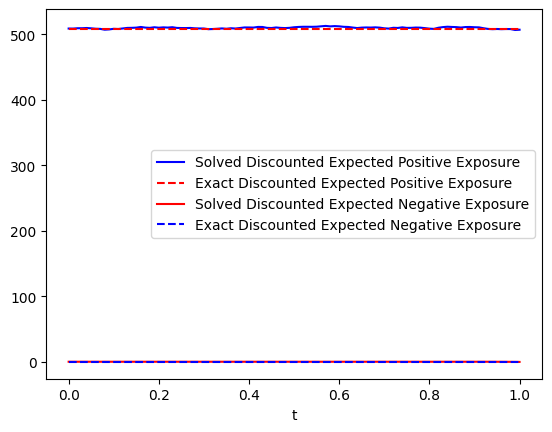

In [22]:
fig = plt.figure()
plt.plot(time_stamps,np.transpose(epe),'b',label='Solved Discounted Expected Positive Exposure' )
plt.plot(time_stamps,epe_exact,'r--',label='Exact Discounted Expected Positive Exposure')
plt.plot(time_stamps,np.transpose(ene),'r',label='Solved Discounted Expected Negative Exposure')
plt.plot(time_stamps,ene_exact,'b--',label='Exact Discounted Expected Negative Exposure')

plt.xlabel('t')
plt.legend()

plt.show()

In [23]:
np.mean((epe_exact - epe)**2 / epe_exact ** 2) 

2.6049057239045237e-05

In [24]:
var = np.abs(np.quantile((Y_preds - Y_preds[:,0][:,None]), 0.05, axis=0))

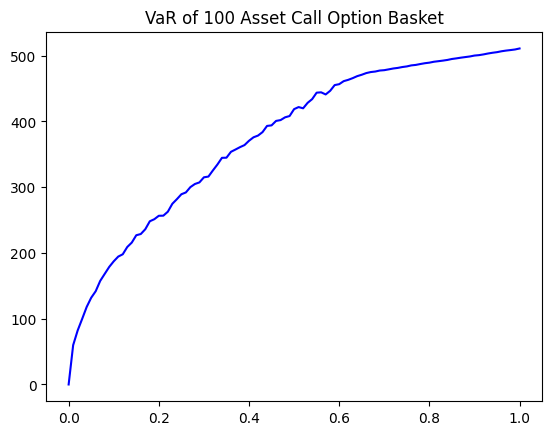

In [25]:
plt.title('VaR of 100 Asset Call Option Basket')
plt.plot(time_stamps,var,'b',label='VaR')
plt.show()

In [26]:
rate = 0.01
R_C = 0.3
R_B = 0.4
collateral = 0
intensityC = 0.1
intensityB = 0.01

In [27]:
Y_preds

array([[ 5.0894412e+02,  5.3250195e+02,  5.7124207e+02, ...,
         4.4776636e+02,  4.8864041e+02,  4.3082352e+02],
       [ 5.0894412e+02,  5.6577661e+02,  5.5122534e+02, ...,
         1.8465840e+00,  1.0510528e+00, -6.0944921e-01],
       [ 5.0894412e+02,  5.1285168e+02,  4.9497318e+02, ...,
         7.2937463e+02,  7.3552081e+02,  7.7805817e+02],
       ...,
       [ 5.0894412e+02,  4.8287134e+02,  4.1790262e+02, ...,
         6.9974573e+02,  7.3057111e+02,  7.6429584e+02],
       [ 5.0894412e+02,  5.7059790e+02,  5.6178210e+02, ...,
         4.8473392e+02,  5.2069519e+02,  5.5958057e+02],
       [ 5.0894412e+02,  4.7121454e+02,  5.1748297e+02, ...,
         7.9974390e+02,  8.7576611e+02,  8.5009625e+02]], dtype=float32)

In [28]:
discount = np.exp(-(rate+intensityB+intensityC)*np.linspace(0,T,N+1))

In [29]:
phi_cva = (1-R_C)*discount*np.maximum(-Y_preds,0)*intensityC

In [30]:
phi_dva = (1-R_B)*discount*np.maximum(Y_preds,0)*intensityB

In [32]:
dva = np.sum(phi_dva.reshape(4096,1,101), axis=-1) - (phi_dva.reshape(4096,1,101)[:,:,-1] + phi_dva.reshape(4096,1,101)[:,:,0])/2

In [33]:
dva

array([[302.75989941],
       [193.69762366],
       [382.69116982],
       ...,
       [415.08554678],
       [231.46697659],
       [376.27806642]])

In [34]:
dva[:,0] * T/N

array([3.02759899, 1.93697624, 3.8269117 , ..., 4.15085547, 2.31466977,
       3.76278066])

In [35]:
dva_pred = np.mean(dva[:,0] * T/N)
dva_pred

2.9553224469387747

In [36]:
dva_exact = np.sum(epe_exact * intensityB * discount) * (1-R_B) * T/N
dva_exact

2.8993785421657265

In [37]:
np.mean((dva_exact - dva_pred)**2 / dva_exact ** 2) 

0.00037230229304329365

In [158]:
model.save_model("models/100DCallOptionXVAPaper.pth")